# Rock Drop
## PH 211 Lab
### Feb 15, 2021
### Zachary Bochanski

The goal of this notebook is to document the process of finding the unknown height of an object through the use of a falling ball of wadded paper. The tools available are a tape measure and stop watch. That's really all we need aside from an understanding of knowing how a falling object (paper ball) somewhat behaves so we can make a logical inference about what the collected data means.

The likely course of action here is finding the time it takes for the same object to fall from various heights. Then make a plot of the data, create a model and use the model to estimate heights.

Why can't we figure out the hight of things knowing the gravitational constant on the surface of earch is around 10m/s/s? Because the paper ball is pretty "floaty" and suseptable to air drag so we need to find a new constant `k`.

### Imports

Importing packages `numpy`, `polynomial`, and `matplotlib` for use within the lab.

In [1]:
import numpy as np
import matplotlib as mplot
import matplotlib.pyplot as plt
from numpy.polynomial import polynomial as ply

### Concept of Operations/ Procedure

1. Measure time it takes for paper ball to get dropped from different heights
2. Plot height vs time
3. Fit curve
4. Compart fit to standard kinematic expression (assuming constant acceleration)
5. Plot ideal curve to fit
6. Is terminal velocity suggested?
7. Unknown height

### Measurement Contraption

The ski pole aparatus to hold paper ball consists of multiple cross country ski poles duck taped to a max height of five meters. The main idea behind this method is the ability to be close to where the paper hits the ground. Using the iPhone stopwatch, timing begins after dropping the paper ball off the ski pole then stopping the time when the ball hits the ground. Initially, the concept was to attach a rasperry pi with a camera to the base of the pole contraption to accuratly record the paper hitting the groud. It turned out to be unreliable so the idea was abandoned. Perhaps another time.

### Record Data

To gather 

Two list of data to record, the height and flight time.

1. `time_data = []` in seconds
2. `height_data = []` in meters

| Time Data (s): | Height Data (m): |
| ------ | ------ |
| .43 | .5  | 
| .56 | 1   | 
| .68 | 1.5 | 
| .81 | 2   | 
| .92 | 2.5 | 
| .99 | 3   | 
| 1.15| 3.5 | 
| 1.23| 4   | 
| 1.29| 4.5 | 
| 1.33| 5   |

In [33]:
# Lists to store data
time_data = [0, .43, .56, .68, .81, .92, .99, 1.15, 1.23, 1.29, 1.33]

height_data = [0, .5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]

# Display data
print("flight time:",time_data)
print("height:",height_data)

timedata_length = len(time_data)
heightdata_length = len(height_data)

# Make sure the lists are equal length
print("number of data points (x):", timedata_length)
print("number of data points (y):", heightdata_length)

flight time: [0, 0.43, 0.56, 0.68, 0.81, 0.92, 0.99, 1.15, 1.23, 1.29, 1.33]
height: [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
number of data points (x): 11
number of data points (y): 11


### Plot for Calibrating Model

- y axis - height (m)
- x axis - drop time (s)

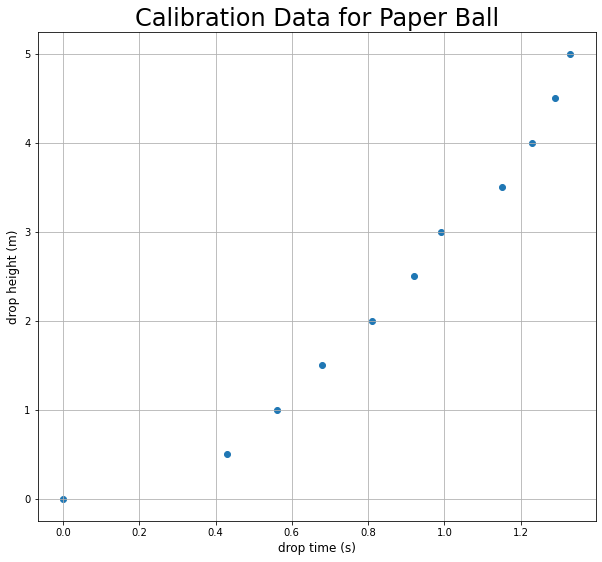

In [34]:
fig1, ax1 = plt.subplots()
ax1.scatter(time_data, height_data)


# Labels
plt.xlabel('drop time (s)', fontsize = 12)
plt.ylabel('drop height (m)', fontsize = 12)
plt.title('Calibration Data for Paper Ball', fontsize = 24)

fig1.set_size_inches(10, 9)
ax1.grid()

# Render plog
plt.show()

### Data Characteristics

At first glance the 3(m) drop height data point is a little "fast" compared to the trend of the other points, most likely a flaw between coordinating the drop of the paper ball and physically hitting the stop/start button; that being said the method of using a couple xc ski poles to hold up the paper ball seemed pretty consistent. Also the 5m drop height seems fast as well.

The 0,0 point is important for the begining of calibrating the model. It needs to be made clear that at 0 seconds there is 0 displacement from the paper ball.

The curve matches the concept that the paper is accelerating as it falls toward the center of the earth.

In [37]:
# Finding the change in time between each data point.

# Change in time per half meter
time_change = [] # store calculations for time difference
for i in range(len(time_data)-1):   
    difference = time_data[i+1]-time_data[i] # x_a - x_b
    time_change.append(difference)
print("time change:", time_change)

# Variability of the time data.
time_mean = np.mean(time_data)
time_sigma = np.std(time_data)
variation = 100.*time_sigma/time_mean

# Display Variability
print("Variability is %.2f%%" % variation)

time change: [0.43, 0.13000000000000006, 0.12, 0.13, 0.10999999999999999, 0.06999999999999995, 0.15999999999999992, 0.08000000000000007, 0.06000000000000005, 0.040000000000000036]
Variability is 46.00%


### Curve Fitting

The data points collected can be used to generate a curve that acts as the model for dropping the paper ball. The model can be used to predict the height of unknow objects. A numpy package feature can be used to do this. Create a polynomial object and perform a least squares fit with `numpy`. Least squares fitting is a procedure for finding the bese fitting curve for a specific set of points. The height data and time data are passed into this numpy function.

In [53]:
degree = 3
coefs = ply.polyfit(time_data, height_data,degree)
print("Polynomial coefficients:", coefs)

Polynomial coefficients: [-0.02264075  0.24754497  3.03092043 -0.37381195]


### Least squares fit, ideal physics rock curves

Add the best-fitting curve and the curve of an ideal rock. The `coefs` and their various indexes are used to dictate the shape of the curve.

In [61]:
# Model x values
maxtime = 2.0
numpoints = 20
modeltime = np.linspace(0.,maxtime,numpoints)

# Model height and time list
modelheight = np.full_like(modeltime,0)
idealrock = np.full_like(modeltime,0)

# Predicted heights
modelheight = coefs[0] + coefs[1]*modeltime + \
        coefs[2]* modeltime**2 + coefs[3]*modeltime**3

# calculate an ideal physics rock (no air drag and a = 9.81 m/s/s)
idealrock = 0.5*9.81*modeltime**2

for i in coefs:
    print(i)

-0.02264074916982681
0.24754497028724676
3.0309204277609108
-0.37381195304172243


### Plot of the data and curves
The plot for the ideal rock, the fitted curve and the unknown height. So the linspace array (which is stored in the `modeltime` variable), are the equal numerical "steps" that serve as the x axis for the model which is time. From each step the y axis is represented by the distance the object has traveled while in free-fall.

- Unknown height is the verticle line where an object was droped from any height and the time is know.
- The ideal rock curve move more distance in the same time as the fit from our sample points most likely because the air drag forces acting on the paper ball are more noticible.
- The fitted curve to the collected sample points shows the paper ball moving less distance in the same amount of time as the ideal physics rock. The ideal curve for the physics rock is: $\frac{1}{2} a_x t^2$ and this is know because acceleration of gravity on the surface of earth is measured at 9.81m/s/s. So if the curve for the ideal rock is: $\frac{1}{2} 9.81 t^2$, then we know to find distance for the paper ball the equation would probably look similar just with a different coefficient to represent the different forces noticibly involved acting on the paper ball.

To represent the sampled points the polynomial fit has been calculated to the 3rd degree using least squares fit method in numpy. This polynomial represents the distance traveled during uniform "free fall" acceleration: (about 10m/s/s) + other (unk or guessable) forces involved:

- $\frac{1}{2} (10m/s/s + other\:forces\:)t^2$

From the sample points the equation below indicates that distance is cubic to time:

- $\large -.023 + .25t + 3t^2 - .37t^3$

And then the modified kinematics equation:

- $\large x_f = x_0 + v_{x_0} t + \frac{1}{2} (10m/s/s + other\:forces\:)t^2$

And the distance equation:

- $\large x_f = x_0 + v_{x_0} t + (-.023 + .25t + 3t^2 - .37t^3)$



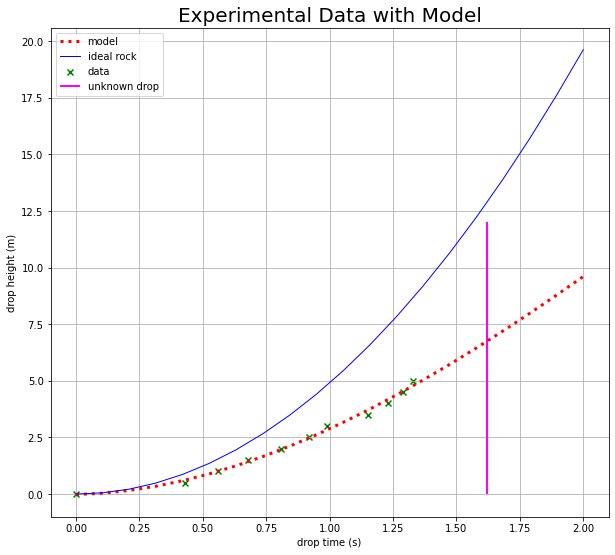

In [58]:
fig2, ax2 = plt.subplots()

# This is the plot of the actual data
ax2.scatter(time_data, height_data,
            marker = 'x', color = 'green',
            label = "data")

# This is the plot of your polynomial curve fit
ax2.plot(modeltime, modelheight,
         color = 'red', linestyle = ':',
         linewidth = 3., label = "model")

# This is the plot of an ideal physics rock
ax2.plot(modeltime, idealrock,
         color = 'blue', linestyle = '-',
         linewidth = 1., label = "ideal rock")

# This is the drop time you measured for your unknown height
# followed by a plot of a vertical line 'vlines' at that point
# You MAY need to change the 12 to a different number. See what 
# happens when you do.
unknown_data = 1.62
ax2.vlines(unknown_data, 0, 12,
         color = 'magenta', linestyle = '-',
         linewidth = 2., label = "unknown drop")


# a more explicit way to set labels
plt.xlabel('drop time (s)', fontsize = 10)
plt.ylabel('drop height (m)', fontsize = 10)
plt.title('Experimental Data with Model', fontsize = 20)

fig2.set_size_inches(10, 9)
ax2.grid()

plt.legend(loc= 2)
plt.show()

### Terminal Velocity?

Terminal velocity would be indicated by a constant velocity and occur when the forces such as air drag that are resisting accelerating prevent the object from accelerating further. The paper ball in this experiment does not seem to reach terminal velocity. The curve sarts to straighten out and appears to be approaching terminal velocity, however it is still fairly curved and still accelerating at 2 seconds, it will probably continue accererating for at least a little while longer.

### Unknown Height

After a sketchy clambering onto the metal garage roof, out of 3 drops the average time turned out to be 1.62 seconds. The magenta line a t=1.62 shows that the height of the apex of the roof (where the paper ball was dropped from), should measure 7.4 m according the the model. To confirm this I took a tape measure to the garage and the final measurement was a little under 24ft (7.3m). It looks like the model got close but the prediction was just under a meter off. Those points that looked "too fast" are influencing the fit in a way where the predictions will come out higher.

The plot is easier to visualize than the calculation below but it's nice to see a value to compare to the physical measurement and check the prediction.

In [59]:
predicted_height = coefs[0] + coefs[1]*unknown_data + \
        coefs[2]* unknown_data**2 + coefs[3]*unknown_data**3

print("The predicted height of unknown drop is (m):", predicted_height)

The predicted height of unknown drop is (m): 6.743457688219681


### Reflection

This lab was a great experience for showing how things in the real world do not follow ideal circumstances. The important thing I learned in this lab was that you can take some simple measurments, create a fit for the samples or calibration, then apply the ideal physics relationships and just make some modifications to the og equation. I think I'm on the right track with plugging in the "fitted model" to replace the "ideal" model. I'll admit this lab took some time to make that mental ah-ha. 

- Very helpful to already have a convinient knowledge of the fundamental relationship, or how the ideal "rock" in this case fit perfectly into the kinematics equation.